In [45]:
import numpy as np
import matplotlib.pyplot as plt

def polynomT(x):
    return  (9.311 - 8.795*x + 66.49*(x**2)  - 100.035*(x**3) - 77.29*(x**4) + 482.351*(x**5)  - 702.411*(x**6) + 511.389*(x**7) - 203.844*(x**8) + 42.525*(x**9) - 3.640*(x**10))

R = 1000#ohm
A = 0.005 * 0.00033 #m^2
x = 0.013 #m
m = 0.00278 #kg
V = 10000 #Verstärkung

In [55]:
############# - Referenzmessungen bei 300 K - ################
Up_ref=7#V
t_ref=5#s
T_ref = 300.8#K
U_davor_ref 0 = np.array([-4, -22.4])#mV
U_max_ref 0 = np.array([-28, -44])#mv
p1_ref=13#mbar , ohne Fehler da für Auswertung irrelevant (4 Werte für C und lambda-Messung), ebenso
p2_ref=[9.8e-5, 1.2e-4, 1.6e-4, 1.5e-4]#mbar
U_Heiz_ref = 3#V
U_0_ref = np.array([2.4, 2.4])#mV
U_diff_ref = np.array([100, 100])#mV
dU_ref = 0.8#mv für alle Spannungen in mV
#Restliche Fehler wie unten

SyntaxError: invalid syntax (<ipython-input-55-64131ffab7d2>, line 4)

In [57]:
############# - Probemessungen nache 5 K - ################
# Vor erstellen des Vakuums aufgenommen, damit Temperatur noch konstant, daher wahrsch. unbrauchbar
Up_p=2.00#V
dUp_p=0.08#V
t_p=1#s
dt_p=0.04#s
T_p = np.array([4.78, 4.8, 4.83, 4.87,4.88, 4.89, 4.92,4.98,5.01])#K
dT_p = 0.2#K
p1_p = 5e-4#mbar , Druckfehler wie oben irrelevant
p2_p = 5.7e-2#mbar
U_davor_p = np.array([-4,-3,-2,-2,-2,-2,-2,-2,-2,-2]) #mV
dU_davor_p = np.array([1,1,1,1,1,1,1,1,1,1])#mV
U_max_p = np.array([-156,-156,-156,-156,-156,-152,-152,-152,-152,-152])#mV
dU_max_p = np.array([1,1,1,1,1,1,1,1,1,1])#mV
DU_p = U_max_p - U_davor_p

U_Heiz_p = 3.5#V
dU_Heiz_p = 0.1#V
U_0_p = np.array([-5,-6,-6.4,-6.4,-7.2,-7.2,-7.2,-7.2,-7.2,-7.2])#mV
dU_0_p = np.array([1,1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])#mV
U_diff_p = np.array([8,7.2,8,8,8.8,8,8,8,7.2,6.4])#mV
dU_diff_p = np.array([1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])#mV

In [46]:
############# - Hauptmessung - ################
# Einheiten i.A. wie oben, bemerke dass beim ersten Messpunkt noch zu hoher Druck, daher wahrsch. unbrauchbar

#Versuchsteil Wärmekapazität
Up=np.array([2,2,2,2,2, 2,2,2,2,2, 3,3,3,3,3, 4,4,5.5,5.5,5.5,7,7,7])#V
dUp=0.08#V
t=np.array([1,1,1,1,1, 1,1,1,1,1, 2,2,2,2,2, 2.5,2.5,3.5,3.5,3.5, 4,4,4])#s
dt=0.04#s
p1 = 5.0e-4#mbar
p2 = [1.4e-5, 2.2e-5, 2.7e-5, 1.1e-4, 1.5e-4, 2.1e-5,8.8e-6]#mbar     #v t=2, Up=3                     v t=2.5, Up = 4 v t=3.5,Up=5.5        v t=4,Up=7
T1 = np.array([5.12,6.03,7.42, 7.86, 8.51,9.01,9.51, 10.01, 11, 12.02, 13.55, 15.19, 17.7, 21.42, 26.30, 34.77, 45.7 , 63.77, 79.28 , 111.01, 147.20, 190.53, 245.6])
dT1 = 0.2 #K                             *                          *                                 *                                    *
U_davor = np.array([-76,24,16,12,0, 0,4,-4,6,10,  8, 8, -22, -10, 8,  -18, -26, -38, -13, -24.8, -33.6, 12.8, 5.2]) #mV
dU_davor = np.array([1,1,1,1,1, 1,1,1,1,1, 2,2,2,1,1, 1,1,1,1,1, 1,1,1])#mV
U_max = np.array([-166,-384,-346,-322,-286, -258, -236, -220, -178, -136,  -428, -336, -240, -135, -58,  -76, -52, -77, -44, -44.8, -65.6, -9.2, -14])#mV
dU_max = np.array([1,1,1,1,1, 1,1,1,1,1, 2,2,2,1,1, 1,1,1,1,1, 1,1,1])#mV
DU = U_davor - U_max
dDU = np.sqrt( dU_davor**2 + dU_max**2 )

## Versuchsteil Wärmeleitfähigkeit
U_Heiz = 3.5#V
dU_Heiz = 0.1#V
T2 = np.array([6.01,7.40,7.88,8.18,8.82,9.36,9.78,10.26,11.18, 12.23, 13.76, 15.01, 17.79, 20.74, 25.75, 34.27, 45.57, 63.50, 79.03, 111.01, 146.95, 190.50, 245.4])#K
dT2 = 0.2#K
U_0 = np.array([-9.6,-5.6,-4.8,-4,-4,-3.2, -3.2, -2.4,-2.4, -2.4, -4, -1.6, 0.8,0.8, 0,0, -1.6, -1.6, -0.8, 1.6, 6.4, 8, 14])#mV
dU_0 = 0.1 #np.array([0.1])#mV
U_diff = np.array([-4.8, 9.6,11.2,11.2, 11.2, 11.2, 11.2, 11.2, 11.2, 10.8, 10.4,11.6, 12, 12.8, 12.8, 13.6, 12, 14.4, 17.6, 31.2, 53.6, 80, 119])#mV
dU_diff= 0.1 #np.array([0.1])#mV
DUl = U_diff - U_0
dDUl = np.sqrt( dU_diff**2 + dU_0**2 )

l1 = np.logspace(0.5,2,200)#np.log(T1)
l2 = np.log(T2)
dT1dU = polynomT(np.log10(l1))
dT2dU = polynomT(l2)

16.05100000000005

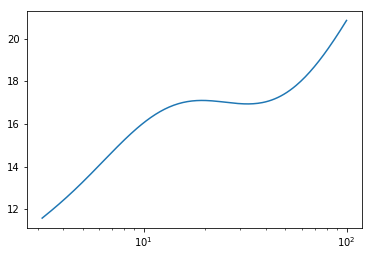

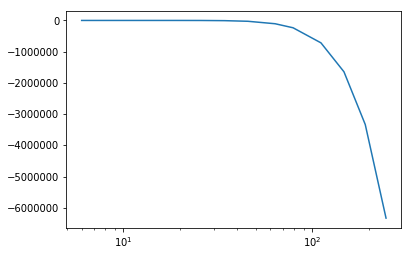

In [47]:
plt.figure(1)
plt.xscale("log")
plt.plot(l1, dT1dU)
plt.figure(2)
plt.xscale("log")
plt.plot(T2, dT2dU)
polynomT(1)

In [48]:
C_P = t * (Up**2) * polynomT(np.log10(T1))*V / (R * DU*1000)

In [49]:
C_P

array([5.93797262e-03, 1.37714264e-03, 1.64921281e-03, 1.81573166e-03,
       2.16433456e-03, 2.43246460e-03, 2.64699890e-03, 2.97301030e-03,
       3.55242424e-03, 4.54007325e-03, 6.94234387e-03, 8.88297411e-03,
       1.41075969e-02, 2.46046750e-02, 4.63619385e-02, 1.16878049e-01,
       2.65136394e-01, 4.96512554e-01, 6.62595535e-01, 1.14202419e+00,
       1.44721267e+00, 2.28800821e+00, 2.85520192e+00])

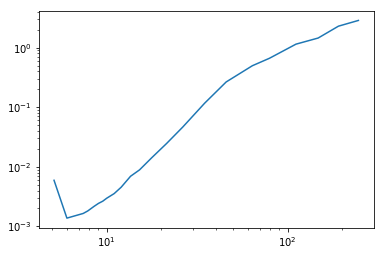

In [54]:
plt.plot(T1, C_P)
plt.yscale("log")
plt.xscale("log")